In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import unidecode as un
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

N_GRAM_ALPHABET = "abcdefghijklmnopqrstuvwxyz"
N_GRAM_COUNT = 3

training_base_path = 'datasets/training_data/'
testing_dir = [('finnish','datasets/europarl/txt/fi'), ('german','datasets/europarl/txt/de'), ('english','datasets/europarl/txt/en'), ('french','datasets/europarl/txt/fr'), ('italian','datasets/europarl/txt/it'), ('spanish','datasets/europarl/txt/es'), ('swedish','datasets/europarl/txt/sv'), ('dutch','datasets/europarl/txt/nl'), ('portuguese','datasets/europarl/txt/pt'), ('czech','datasets/europarl/txt/cs'), ('polish','datasets/europarl/txt/pl'), ('slovak','datasets/europarl/txt/sk'), ('hungarian','datasets/europarl/txt/hu'), ('romanian','datasets/europarl/txt/ro'), ('bulgarian','datasets/europarl/txt/bg'), ('danish','datasets/europarl/txt/da'), ('estonian','datasets/europarl/txt/et'), ('greek','datasets/europarl/txt/el'), ('latvian','datasets/europarl/txt/lv'), ('lithuanian','datasets/europarl/txt/lt'), ('slovenian','datasets/europarl/txt/sl')]

In [19]:
def load_data(file_name):
    data = []
    with open(file_name, 'r', encoding='utf-8') as f:
        data = f.readlines()
    return data

def load_training_data(base_path):
    languages = get_subdirectories(base_path)

    labels_list, n_grams_list = process_data(languages)
    return labels_list, n_grams_list

def load_testing_data(dir_path, key, files = None):
    data = []
    count = 0
    for file_name in os.listdir(dir_path):
        if files is not None and count >= files:
            break
        data.append((key, dir_path + "/" + file_name))
        count += 1
    return data

def get_subdirectories(base_path):
    subdirectories = []
    for root, dirs, files in os.walk(base_path):
        for dir in dirs:
            full_path = os.path.join(root, dir)
            subdirectories.append((dir, full_path))
    return subdirectories

def process_data(path_tuple):
    sentances_list = []
    labels_list = []
    n_grams_list = []
    unique_subdirs = {}
    for subdir, path in path_tuple:
        if(unique_subdirs.get(subdir) is None):
            unique_subdirs[subdir] = 1
        if os.path.isfile(path):
            sentances = load_data(path)
            n_grams = create_n_grams(sentances, N_GRAM_COUNT)
            labels_list.append(subdir)
            sentances_list += sentances
            n_grams_list.append(n_grams)
        else:
            for file in os.listdir(path):
                if "-sentences" in file:
                    full_file_path = os.path.join(path, file)
                    sentances = load_data(full_file_path)
                    n_grams = create_n_grams(sentances, N_GRAM_COUNT)
                    labels_list.append(subdir)
                    sentances_list += sentances
                    n_grams_list.append(n_grams)
    return labels_list, n_grams_list

def create_n_grams(sentances, n):
    n_grams = {}
    for line in sentances:
        df = un.unidecode(line).lower()
        
        for x in df:
            if(x not in N_GRAM_ALPHABET):
                df = df.replace(x, '')

        ngrams = [df[i:i+n] for i in range(len(df)-1)]
        for ngram in ngrams:
            if (n_grams.get(ngram) is None):
                n_grams[ngram] = 1
            else:
                n_grams[ngram] += 1
    return n_grams

In [20]:
def generate_atomic_hd_vectors(dimensions):
    atomic_hd_vectors = {}
    for letter in N_GRAM_ALPHABET:
        atomic_hd_vectors[letter] = np.random.choice([-1,1], dimensions)
    return atomic_hd_vectors

def generate_hd_vectors(list_of_sentances, atomic_hd_vectors, dimensions):
    list_of_hd_vectors = []
    for s in list_of_sentances:
        h = np.zeros(dimensions)       
        for ngram in s.keys():
            n_i = np.random.choice([1], size = dimensions)
            s_i = s[ngram]
            j = 1
            for x in ngram:
                n_i = np.multiply(n_i, np.roll(atomic_hd_vectors[x], j))
                j +=1
            h += s_i * n_i
        h = h/np.linalg.norm(h)
        list_of_hd_vectors.append(h)
    return(list_of_hd_vectors)

In [21]:
def run_sim(train_n_grams, train_labels, test_n_grams, test_labels, dim=100):
    atomic_hd_vectors = generate_atomic_hd_vectors(dim)
    train_hd_vectors = generate_hd_vectors(train_n_grams, atomic_hd_vectors, dim)
    test_hd_vectors = generate_hd_vectors(test_n_grams, atomic_hd_vectors, dim)
    
    predictions = []
    for test in test_hd_vectors:
        cos = []
        for training in train_hd_vectors:
            cosine = np.dot(test,training)/(np.linalg.norm(test)*np.linalg.norm(training))
            cos.append(cosine)
        maxIndex = np.argmax(cos)
        predictions.append(train_labels[maxIndex])

    ac = 0
    for i in range(len(predictions)):
        if(predictions[i] == test_labels[i]):
            ac += 1

    accuracy = ac/len(predictions)

    print()
    print(f"Dimensions: {dim}")
    print(predictions)
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1_score(predictions, test_labels, average='weighted')}")
    print("Confusion Matrix:")
    confusion_matrix_string = confusion_matrix(predictions, test_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix_string, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Training data...
Testing data...

Dimensions: 100
['finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'german', 'german', 'german', 'german', 'german', 'german', 'german', 'german', 'german', 'german', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'french', 'french', 'french', 'french', 'french', 'french', 'french', 'french', 'french', 'french', 'italian', 'italian', 'italian', 'italian', 'italian', 'italian', 'italian', 'italian', 'italian', 'italian', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'portuguese', 'portuguese', 'portuguese', 'portuguese', 'portuguese', 'portuguese', 'portuguese', 'portuguese

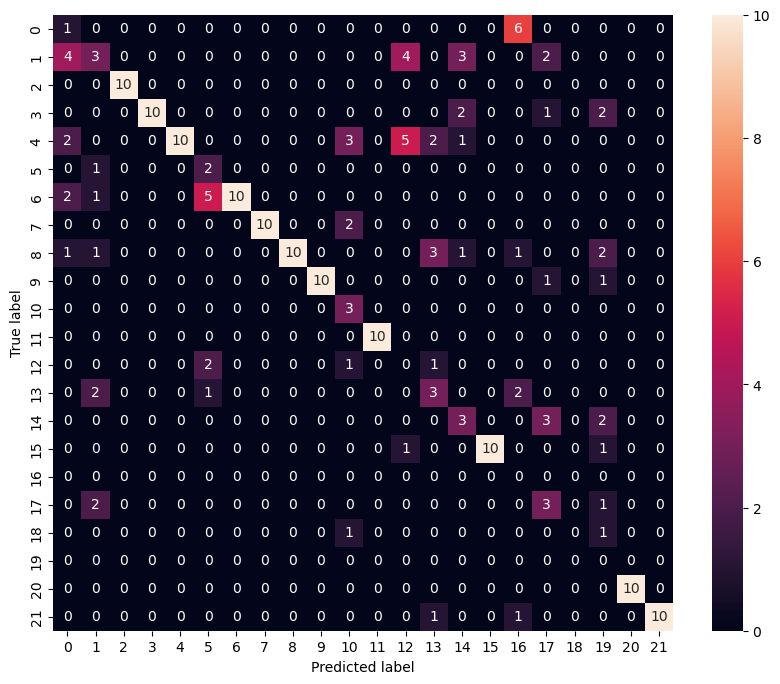


Dimensions: 1000
['finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'finnish', 'german', 'german', 'german', 'german', 'german', 'german', 'german', 'german', 'german', 'german', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'english', 'french', 'french', 'french', 'french', 'french', 'french', 'french', 'french', 'french', 'french', 'italian', 'italian', 'italian', 'italian', 'italian', 'italian', 'italian', 'italian', 'italian', 'italian', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'spanish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'swedish', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'dutch', 'portuguese', 'portuguese', 'portuguese', 'portuguese', 'portuguese', 'portuguese', 'portuguese', 'portuguese', 'portuguese', 'portuguese', '

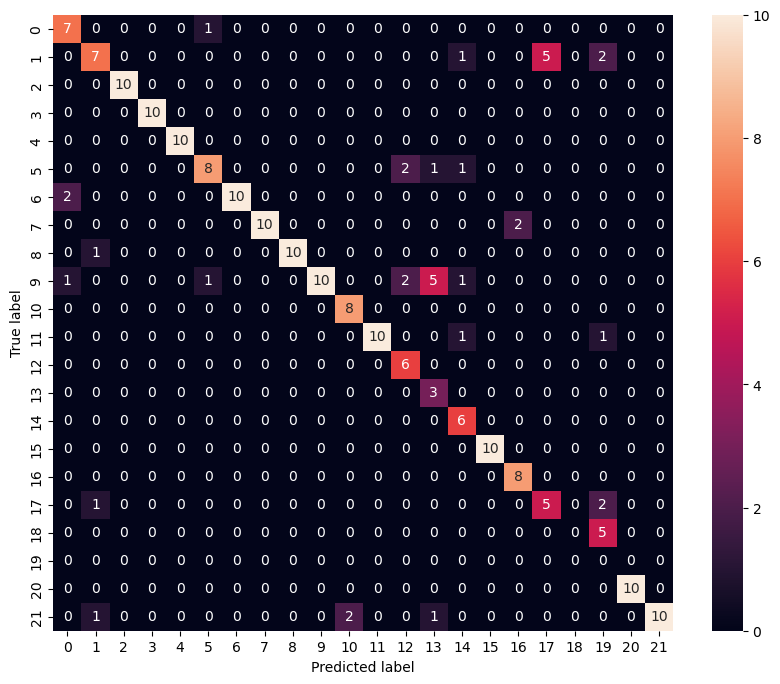

In [22]:
print("Training data...")
train_labels, train_n_grams = load_training_data(training_base_path)

print("Testing data...")
testing_paths = []
for path in testing_dir:
    testing_paths += load_testing_data(path[1], path[0], files=10)

test_labels, test_n_grams = process_data(testing_paths)

run_sim(train_n_grams, train_labels, test_n_grams, test_labels, dim=100)
run_sim(train_n_grams, train_labels, test_n_grams, test_labels, dim=1000)